# Model Building

## 1) Necessary imports

**Run this command to install all nescessary packages**

pip install scikit-learn 

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import xgboost as xgb
from lightgbm import LGBMClassifier

## 2) Read Dataset

In [2]:
#Read the dataset
df_urls = pd.read_csv('processed_urls.csv')

In [3]:
# Display dataset shape and first few records
print(df_urls.shape)
df_urls.head()

(651191, 23)


,url,type,has_ip_address,is_abnormal_url,short_url,dot_count,www_count,at_sign_count,dir_count,embed_domain_count,...,question_mark_count,hyphen_count,equal_sign_count,url_length,hostname_length,has_suspicious_words,digit_count,letter_count,first_dir_length,tld_length
0,br-icloud.com.br,phishing,0,0,0,2,0,0,0,0,...,0,1,0,16,0,0,0,13,0,-1
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,0,2,0,0,2,0,...,0,0,0,35,0,0,1,29,5,-1
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,0,2,0,0,3,0,...,0,0,0,31,0,0,1,25,7,-1
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,0,3,1,0,1,0,...,1,1,4,88,21,0,7,63,9,2
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,0,2,0,0,1,0,...,1,1,3,235,23,0,22,199,9,3


## 3) Creating Train and Test Data

In [4]:
# Encode target variable
lb_make = LabelEncoder()
df_urls['type_code'] = lb_make.fit_transform(df_urls['type'])
print(df_urls['type_code'].value_counts())

type_code
0    428103
1     96457
3     94111
2     32520
Name: count, dtype: int64


In [5]:
#Predictor Variables
X = df_urls[['has_ip_address', 'is_abnormal_url', 'short_url',
       'dot_count', 'www_count', 'at_sign_count', 'dir_count',
       'embed_domain_count', 'https_count', 'http_count', 'percent_count',
       'question_mark_count', 'hyphen_count', 'equal_sign_count', 'url_length',
       'hostname_length', 'has_suspicious_words', 'digit_count',
       'letter_count', 'first_dir_length', 'tld_length']]

#Target Variable
y = df_urls['type_code']

In [6]:
X.head()

,has_ip_address,is_abnormal_url,short_url,dot_count,www_count,at_sign_count,dir_count,embed_domain_count,https_count,http_count,...,question_mark_count,hyphen_count,equal_sign_count,url_length,hostname_length,has_suspicious_words,digit_count,letter_count,first_dir_length,tld_length
0,0,0,0,2,0,0,0,0,0,0,...,0,1,0,16,0,0,0,13,0,-1
1,0,0,0,2,0,0,2,0,0,0,...,0,0,0,35,0,0,1,29,5,-1
2,0,0,0,2,0,0,3,0,0,0,...,0,0,0,31,0,0,1,25,7,-1
3,0,1,0,3,1,0,1,0,0,1,...,1,1,4,88,21,0,7,63,9,2
4,0,1,0,2,0,0,1,0,0,1,...,1,1,3,235,23,0,22,199,9,3


In [7]:
X.columns

Index(['has_ip_address', 'is_abnormal_url', 'short_url', 'dot_count',
       'www_count', 'at_sign_count', 'dir_count', 'embed_domain_count',
       'https_count', 'http_count', 'percent_count', 'question_mark_count',
       'hyphen_count', 'equal_sign_count', 'url_length', 'hostname_length',
       'has_suspicious_words', 'digit_count', 'letter_count',
       'first_dir_length', 'tld_length'],
      dtype='object')

In [8]:
# Spliting data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

## 4) Model Building

### Random Forrest Classifier

In [9]:
rf = RandomForestClassifier(n_estimators=100,max_features='sqrt')
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test,y_pred_rf,target_names=['benign', 'defacement','phishing','malware']))

score = accuracy_score(y_test, y_pred_rf)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

      benign       0.97      0.98      0.98     85621
  defacement       0.98      0.99      0.99     19292
    phishing       0.99      0.94      0.96      6504
     malware       0.91      0.86      0.88     18822

    accuracy                           0.97    130239
   macro avg       0.96      0.95      0.95    130239
weighted avg       0.97      0.97      0.97    130239

accuracy:   0.966


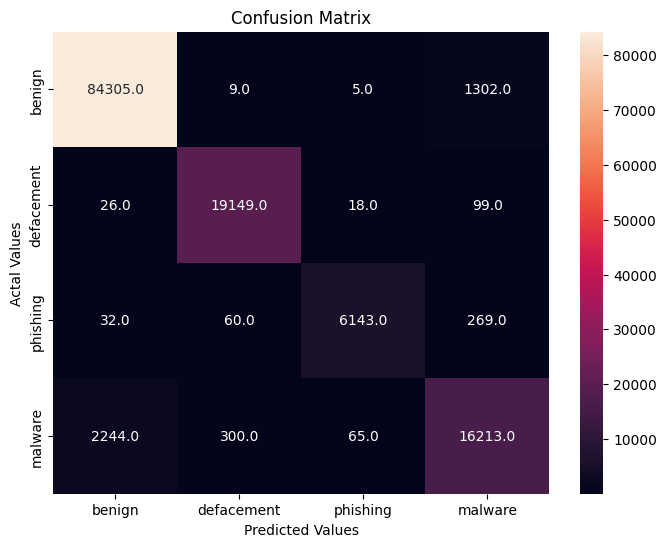

In [10]:
# Generating Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
cm_df = pd.DataFrame(cm,
                     index = ['benign', 'defacement','phishing','malware'], 
                     columns = ['benign', 'defacement','phishing','malware'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

<Axes: >

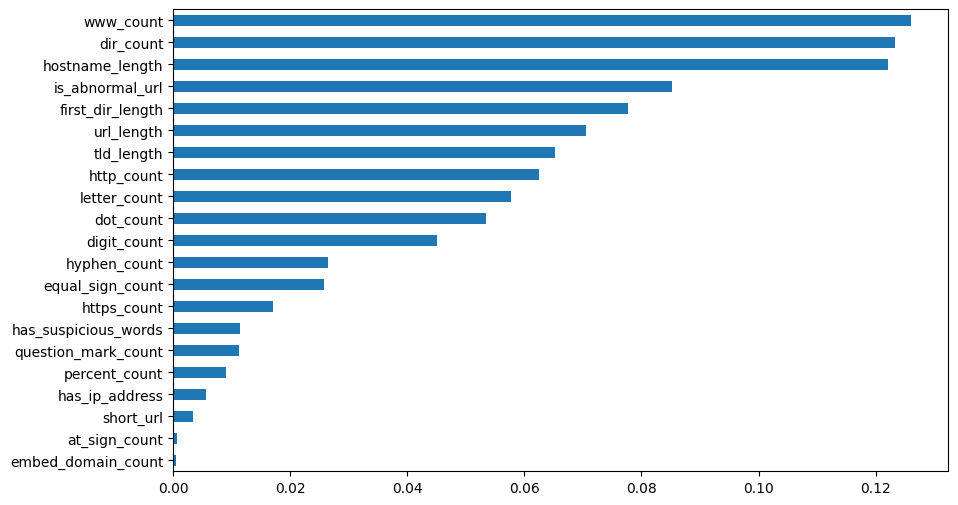

In [11]:
# Determining the features that are important for Random Forrest Classification
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind="barh",figsize=(10, 6))

### XGboost Classifier

In [12]:
xgb_c = xgb.XGBClassifier(n_estimators= 100)
xgb_c.fit(X_train,y_train)
y_pred_x = xgb_c.predict(X_test)
print(classification_report(y_test,y_pred_x,target_names=['benign', 'defacement','phishing','malware']))


score = accuracy_score(y_test, y_pred_x)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

      benign       0.97      0.99      0.98     85621
  defacement       0.97      0.99      0.98     19292
    phishing       0.98      0.92      0.95      6504
     malware       0.91      0.83      0.87     18822

    accuracy                           0.96    130239
   macro avg       0.96      0.93      0.94    130239
weighted avg       0.96      0.96      0.96    130239

accuracy:   0.962


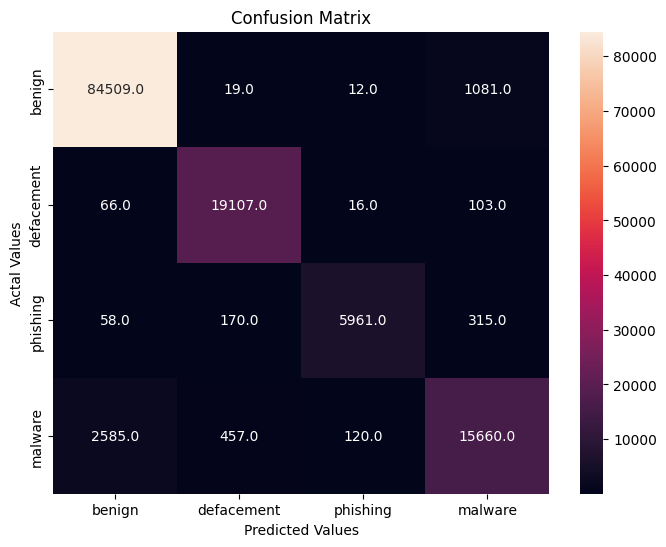

In [13]:
# Generating Confusion Matrix
cm = confusion_matrix(y_test, y_pred_x)
cm_df = pd.DataFrame(cm,
                     index = ['benign', 'defacement','phishing','malware'], 
                     columns = ['benign', 'defacement','phishing','malware'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

<Axes: >

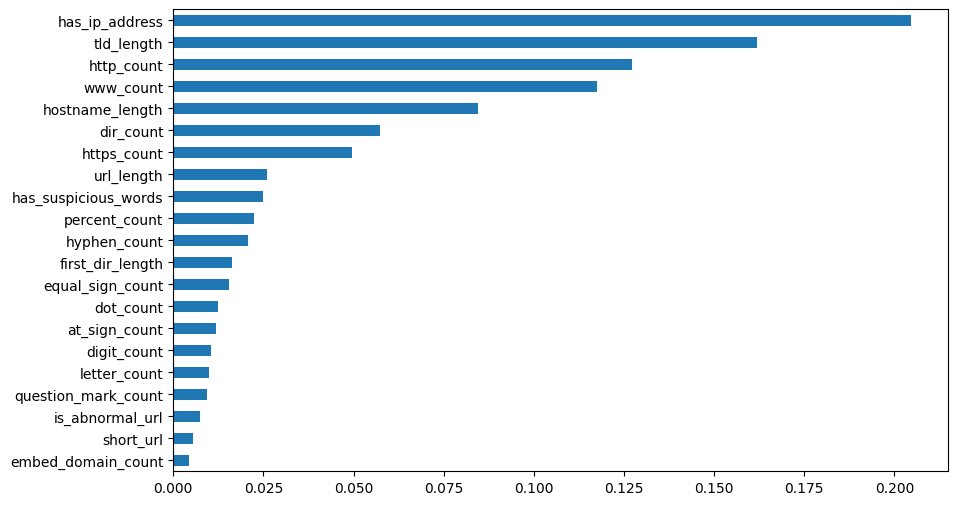

In [14]:
# Determining the features that are important for XGboost Classification
feat_importances = pd.Series(xgb_c.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind="barh",figsize=(10, 6))

### Light GBM Classifier

In [15]:
lgb = LGBMClassifier(objective='multiclass',boosting_type= 'gbdt',n_jobs = 5, 
          silent = True, random_state=5)
LGB_C = lgb.fit(X_train, y_train)


y_pred_lgb = LGB_C.predict(X_test)
print(classification_report(y_test,y_pred_lgb,target_names=['benign', 'defacement','phishing','malware']))

score = accuracy_score(y_test, y_pred_lgb)
print("accuracy:   %0.3f" % score)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028870 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1158
[LightGBM] [Info] Number of data points in the train set: 520952, number of used features: 21
[LightGBM] [Info] Start training from score -0.419439
[LightGBM] [Info] Start training from score -1.909712
[LightGBM] [Info] Start training from score -2.996946
[LightGBM] [Info] Start training from score -1.934324
[LightGBM] [Warning] Unknown parameter: silent
              precision    recall  f1-score   support

      benign       0.97      0.99      0.98     85621
  defacement       0.96      0.99      0.98     19292
    phishing       0.97      0.91      0.93      6504
     malware       0.90      0.83      0.86     18822

    accuracy     

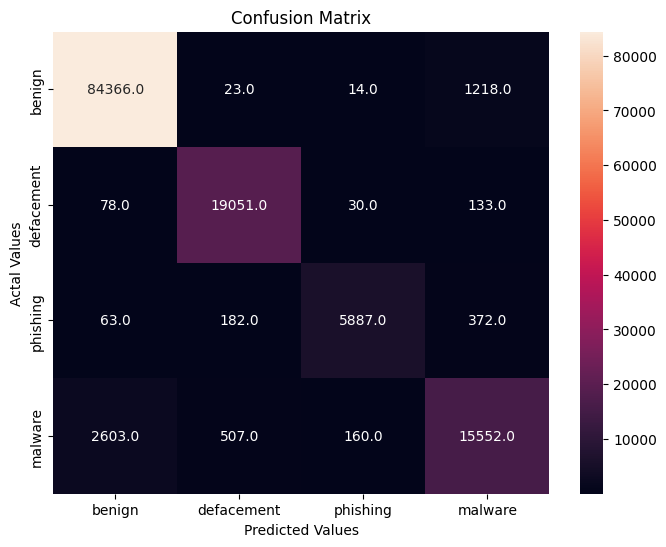

In [16]:
# Generating Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lgb)
cm_df = pd.DataFrame(cm,
                     index = ['benign', 'defacement','phishing','malware'], 
                     columns = ['benign', 'defacement','phishing','malware'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

<Axes: >

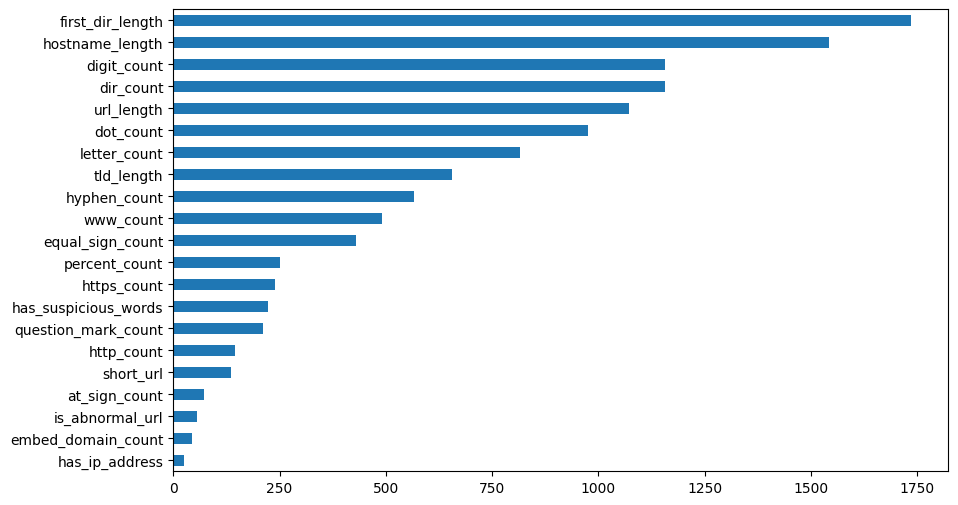

In [17]:
# Determining the features that are important for Light GBM Classification
feat_importances = pd.Series(lgb.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind="barh",figsize=(10, 6))